<a href="https://colab.research.google.com/github/Centrattic/small-things/blob/main/roulette_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
r_cw = [
    "00",
    27, 10, 25, 29, 12, 8, 19, 31, 18, 6, 21,
    33, 16, 4, 23, 35, 14, 2, 0, 28, 9, 26,
    30, 11, 7, 20, 32, 17, 5, 22, 34, 15,
    3, 24, 36, 13, 1
]


In [ ]:
snap_tot = [
    # snap 4 (overlap)
    20, 12, 8, 24, 29, 1, 23, 35, 0, 9,
    13, 16, 12, 26, 7, 25, 20, 5, 6, 25,
    29, 22, 31, 6, 16, 5, 15, 2, 32, 20,
    22, 34, 7, 30, 33, 36, 31, 11, 12, 27,

    29, 32, 7, 7, "00", 6, 30, 19, 11, 32,
    2, 0, 21, 25, 30, 14, 18, 18, 28, 14,
    28, 22, 17, 1, 36, 30, 29, 33, 7, 9,
    10, 6, 16, 35, 25, 18, 31, 1, 10, 9,

    29, 35, 34, 20, 15, 3, 27, 10, 4, 25,
    20, 16, "00", 17, 14, 33, 22, 25, 17, 8,
    12, 22, 17, 21, 1, 19, 33, 20, 24, 1,
    16, 14, 4, 28, 27, 12, 26, 0, 8, 23,

    27, 31, 20, 10, 18, 35, 4, 22, 34, "00",
    28, 34, 34, 33, 24, 11, 18, 29, 24, 3,
    5, 3, 33, 23, 25, 15, 28, 15, 18, 11,
    15, 28, 9, 13, 3, 21, 33, 20, 17, 17,

    13, 3, 31, 23, 29, 4, 22, 29, 23, 9,
    4, 14, 29, 33, 5, 15, 25, 16, 36, 6,
    4, "00", 26, 32, 16, "00", 28, 0, 15, 4,
    35, 6, 35, 18, 23, 31, 2, 2, 11, 35, "gap",

    # snap 3 (no overlap removed)
    10, 16, 34, 20, 31, 23, 17, 32, 29, 12,
    1, 3, 7, 18, 23, 0, 12, 10, 9, 5,
    10, 15, 35, 31, 33, 27, 7, 0, 28, 21,
    34, 13, 3, 28, 16, 8, 24, 7, 17, 11,

    18, 26, 32, 24, 2, 32, 17, 34, 12, 13,
    14, 2, 23, 5, 33, 7, 22, 13, 29, 24,
    8, 3, 36, 1, 4, 9, "00", 35, 24, 32,
    20, 31, 20, 9, 18, 1, 4, 11, 14, 6,

    7, 15, 28, 5, 32, 27, 10, 28, 31, 6,
    12, 4, 30, 4, 23, 2, 25, 20, 36, 0,
    "00", 15, 20, 0, 5, 8, 28, 22, 6, 19,
    11, 0, 25, 9, 14, 33, 10, 3, 35, 28,

    32, 33, 26, 21, 21, 6, 13, 18, 12, "00",
    4, 29, 27, 36, 36, 3, 26, 4, 30, 5,
    24, 28, 36, 28, 33, 15, 0, 11, 1, 15,
    32, 32, 16, 34, 29, 32, 31, 17, 5, 29,

    20, 29, 19, "00", 0, "00", 35, 13, 32, 4,
    4, 33, 23, 0, 4, 31, 15, 8, 22, 15,
    20, 5, 5, 8, 25, 16, 3, 30, 5, 34,
    9, 35, 18, 7, 26, 0, 9, 15, 35, 6,

    # snap 2 (overlap from snap 1 and 3 removed, since poor quality)
    7, 11, 2, 13, 31, 28, 10, 23,
    29, 20, 18, 24, 22, 35, 13, 33, 34, 16, 14, 5, 30, 34, 30, 21, 34, 0, 13, 10,
    19, 13, 1, 1, 6, 2, 14, 14, 33, 1, 1, 4, 21, 34, 33, 17, 32, 28, 20, 6,
    24, 21, 21, 27, 3, 22,

    # snap 1 (no overlaps)
    7, 3, 6, 14, 7, 18, 7, 16, 11, "00",
    8, 36, 7, 22, 1, 7, 15, 9, 30, 16,
    15, 7, 3, 8, 31, 27, 23, 0, 8, 12,
    4, "00", 12, 23, 29, 5, 10, 1, 25, 23,

    36, 18, 25, 14, 16, 21, 32, 27, 29, 35,
    29, 25, 18, 24, 25, 3, 16, 28, 23, 35,
    25, 30, 29, 21, 8, 36, 19, 2, 24, 3,
    0, 24, 18, 8, 9, 28, 7, 16, 25, 17,

    19, 23, "00", 9, 23, 10, "00", 21, 7, 11,
    14, 32, 35, 23, 27, 27, 22, 35, "00", 5,
    1, 5, 30, 32, 9, 16, 29, 28, 25, 34,
    21, 32, 26, 9, 22, 13, 3, 17, 34, 14,

    3, 28, 23, 16, 9, 8, 33, 21, 19, 5,
    27, 5, 27, 24, 21, 5, 10, 31, 6, 21,
    19, 1, 14, 1, 6, 20, 16, 3, 10, 17,
    15, 8, 3, 11, 10, 10, 17, 19, "00", 7,

    14, 28, 10, 20, 34, 11, 33, 13, 27, 11,
    20, 11, 17, 18, 13, 11, 0, 29, 5, 23,
    33, 15, 6, "00", 14, 29, 25, 34, 19, 18,
    18, "00", 25, 18, 7, 26, 14, 13, 20, 21
]


In [ ]:
len(snap_tot)

655

In [114]:
r_dict = {pos: num for pos, num in enumerate(r_cw)}
r_dict

{0: '00',
 1: 27,
 2: 10,
 3: 25,
 4: 29,
 5: 12,
 6: 8,
 7: 19,
 8: 31,
 9: 18,
 10: 6,
 11: 21,
 12: 33,
 13: 16,
 14: 4,
 15: 23,
 16: 35,
 17: 14,
 18: 2,
 19: 0,
 20: 28,
 21: 9,
 22: 26,
 23: 30,
 24: 11,
 25: 7,
 26: 20,
 27: 32,
 28: 17,
 29: 5,
 30: 22,
 31: 34,
 32: 15,
 33: 3,
 34: 24,
 35: 36,
 36: 13,
 37: 1}

In [134]:
def ccw_angular_dist(prev,curr,r_cw):
    r_dict = {pos: num for pos, num in enumerate(r_cw)}

    inv_r_dict = {v:k for k,v in r_dict.items()}

    n = len(r_cw)
    ang_n = 360/n

    pos_prev = inv_r_dict[prev]
    pos_curr = inv_r_dict[curr]

    return ang_n*(pos_curr-pos_prev)# positive is CW shift, negative is CCW shift

def num_dist(prev,curr,r_cw):
    r_dict = {pos: num for pos, num in enumerate(r_cw)}

    inv_r_dict = {v:k for k,v in r_dict.items()}

    pos_prev = inv_r_dict[prev]
    pos_curr = inv_r_dict[curr]

    val = (pos_curr - pos_prev) % 38

    if val > 19:
        val -= 38

    # if val < -19:
    #     val += 38

    # if val > 18:
    #     val -= 38

    return val

In [135]:
def plot_distribution(arr, bins=50, title="Distribution"):
    plt.hist(arr, bins=bins)
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.title(title)
    plt.show()

In [136]:
# Todo: update to work for multiple snapshots

dists = []
for i in range(len(snap_tot)-1):
    curr = snap_tot[i]
    prev = snap_tot[i+1]

    if curr == "gap" or prev == "gap":
        continue

    val = num_dist(prev, curr, r_cw)
    # if val > 29:
    #     print("large positive")
    #     print(prev, curr)
    # if val < -29:
    #     print("large negative")
    #     print(prev,curr)
    dists.append(val)


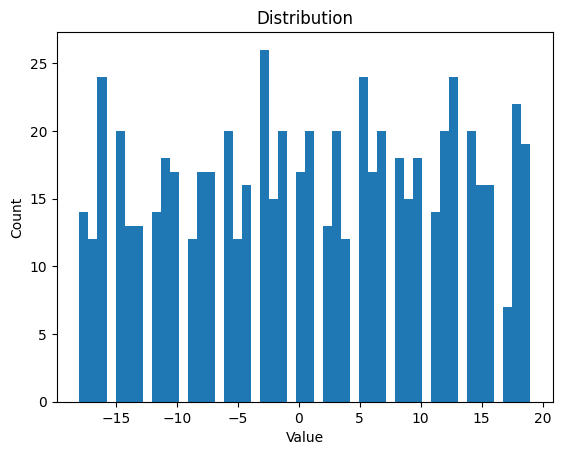

In [137]:
plot_distribution(dists)

**Sliding window plots**

Sliding windows of different sizes, performance increases, plotted from -19 to 18 for intuition. Wheel indices below (for sliding window start), 0-37 for roulette base

```
        0
    -1    1
 -2         2
-3           3
      ...
    -19 18
```

In [191]:
def ev_spin(w, a, n=38): # if bet 1 dollar
    return (w/n + a)*35 / w - 1

In [192]:
def get_advantage(win, j, data, r_cw, money=False):
    # window extends CW
    # j: position of window, w/ 0 being start at prev

    n = len(r_cw)

    r_dict = {pos: num for pos, num in enumerate(r_cw)} # numbered 0 to 37 CW
    inv_r_dict = {v:k for k,v in r_dict.items()}
    # print(inv_r_dict)

    # studying the data, how many times is next number in this window?
    hits = 0
    trials = 0

    for i in range(len(data)-1):
        curr = data[i]
        prev = data[i+1]

        if curr == "gap" or prev == "gap":
            continue

        trials += 1

        # check some windows, must mod ALL positions, not just end pos
        start = (inv_r_dict[prev] + j) % n
        window_positions = [(start + t) % n for t in range(win)]  # EXACTLY win pockets

        for p in window_positions:
            if r_dict[p] == curr:
                hits += 1

    ratio = hits / trials
    expected = win / n
    advtg = ratio - expected

    if money:
        return ev_spin(win, advtg, n=len(r_cw))
    else:
        return advtg

In [193]:
def plot_sliding_window(win, r_cw, data, ax=None, j_range=range(-19, 19), show=False, money=False):

    if ax is None:
        ax = plt.gca()

    vals = []
    js = list(j_range)
    for j in js:
        pos_perf = get_advantage(win, j, data, r_cw, money=money)
        vals.append(pos_perf)

    # print(max(vals))

    ax.scatter(js, vals, s=12)
    ax.set_xlabel("Window start pos")
    ax.set_ylabel("Δ above expected")
    ax.set_title(f"win={win}")

    ax.axhline(0, linewidth=1)
    ax.axvline(0, linewidth=1)

    if show:
        plt.show()

def plot_sliding_windows_grid(r_cw, data, wins=range(5,20), nrows=4, ncols=4, j_range=range(-19, 19), money=False):

    total = nrows * ncols

    wins = list(wins)
    if len(wins) < total:
        wins = wins + [wins[-1]] * (total - len(wins))  # repeat last if short
    elif len(wins) > total:
        wins = wins[:total]

    fig, axes = plt.subplots(nrows, ncols, figsize=(16, 12), sharex=True, sharey=True)
    axes = axes.ravel()

    for ax, win in zip(axes, wins):
        plot_sliding_window(win, r_cw, data, money=money, ax=ax, j_range=j_range, show=False)

    fig.suptitle("Sliding window deltas (wins 1-15)", fontsize=14)
    fig.tight_layout()
    plt.show()


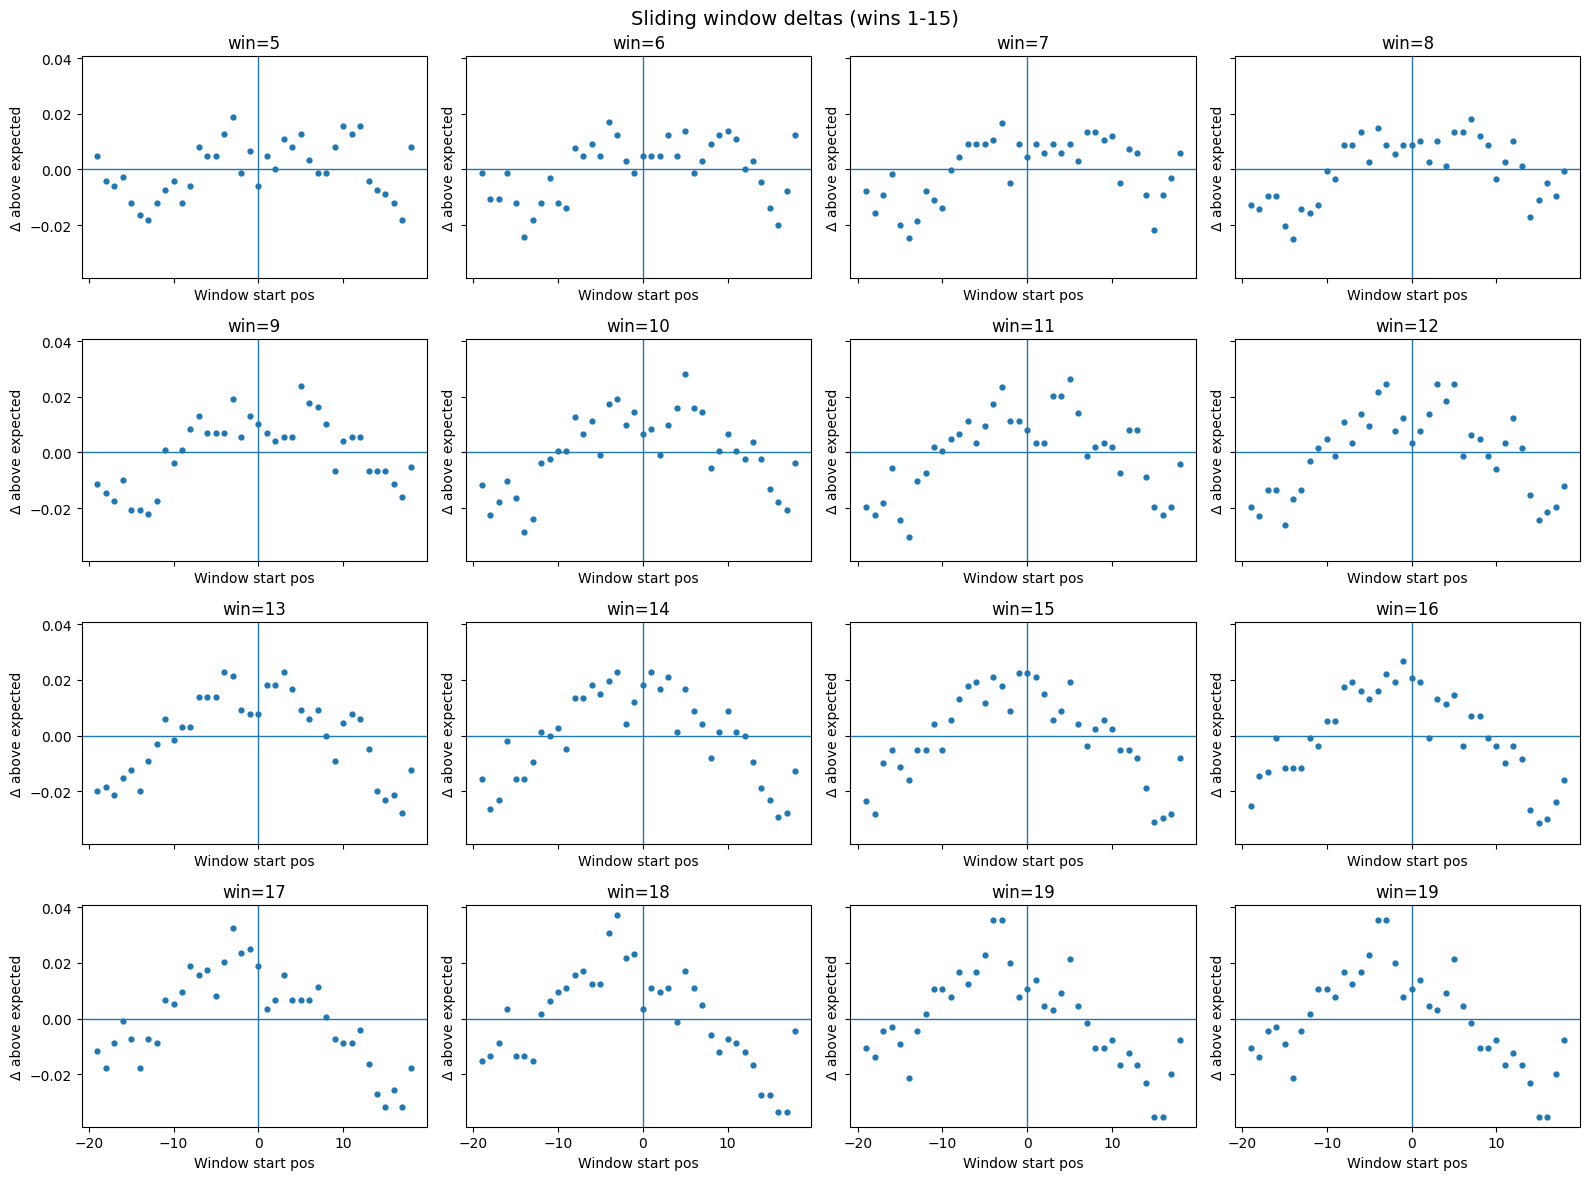

In [194]:
plot_sliding_windows_grid(r_cw, snap_tot)

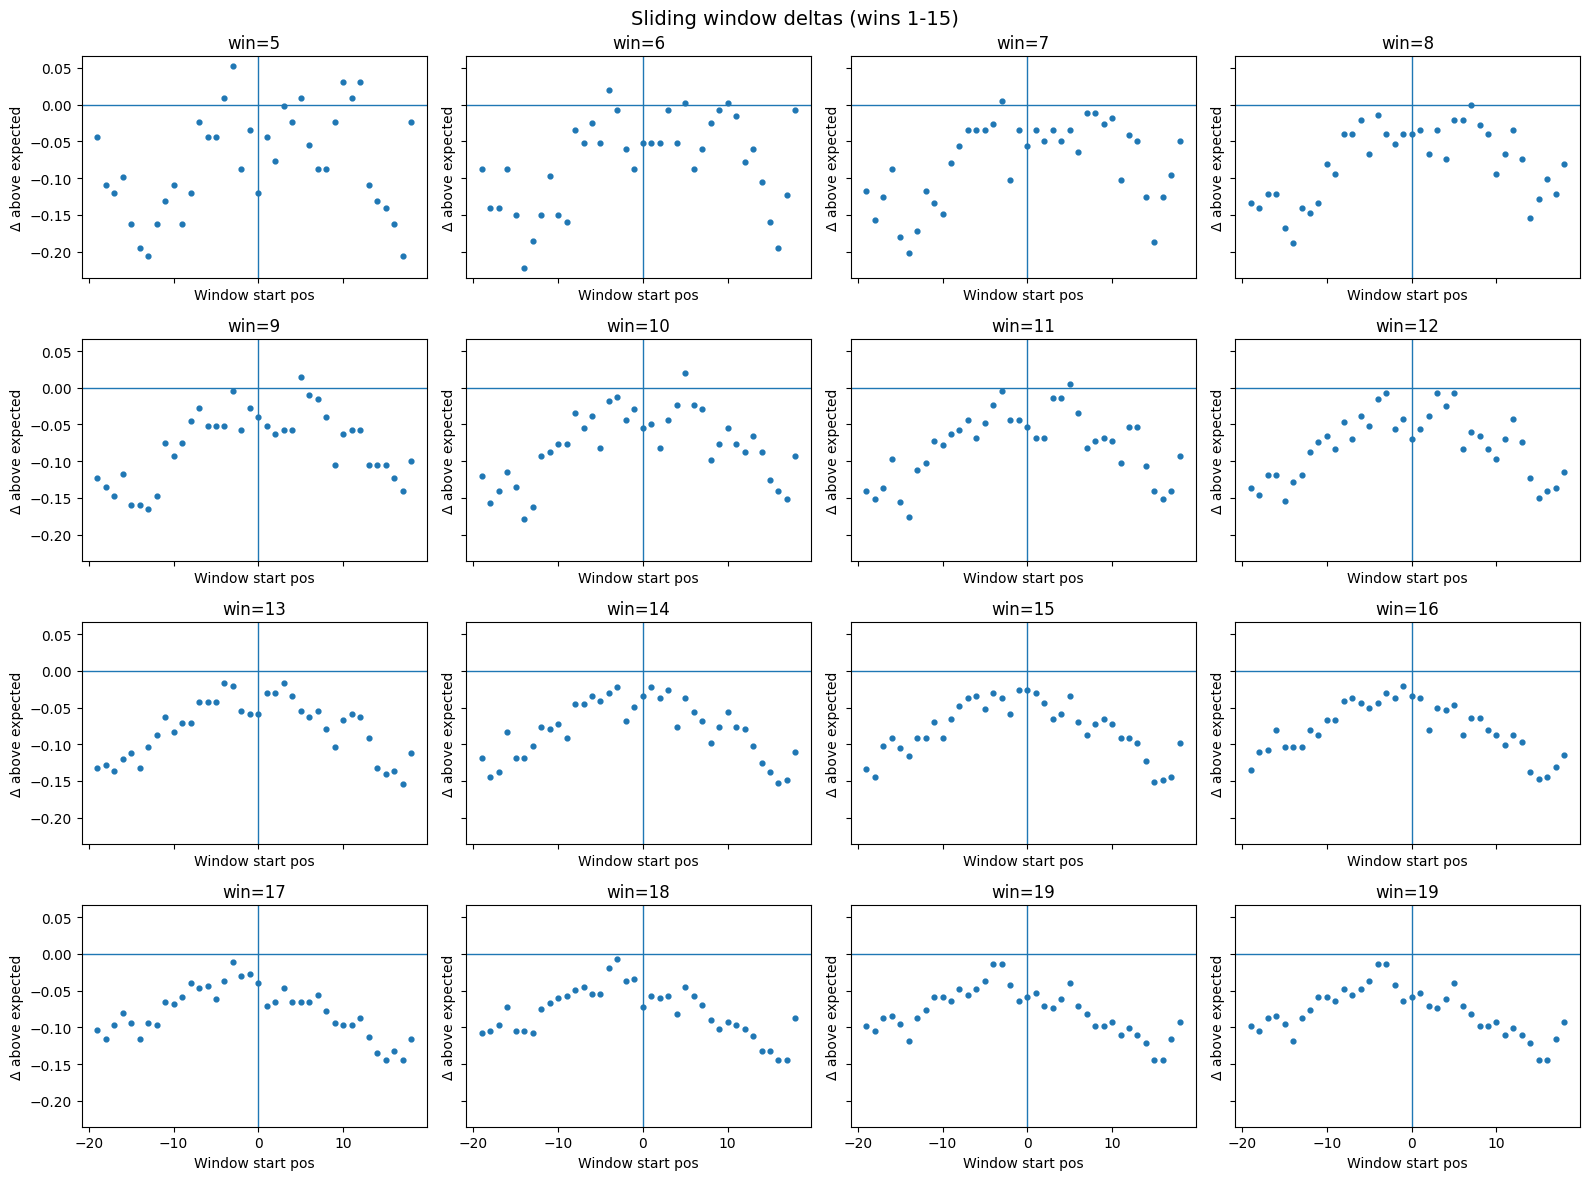

In [195]:
plot_sliding_windows_grid(r_cw, snap_tot, money=True)

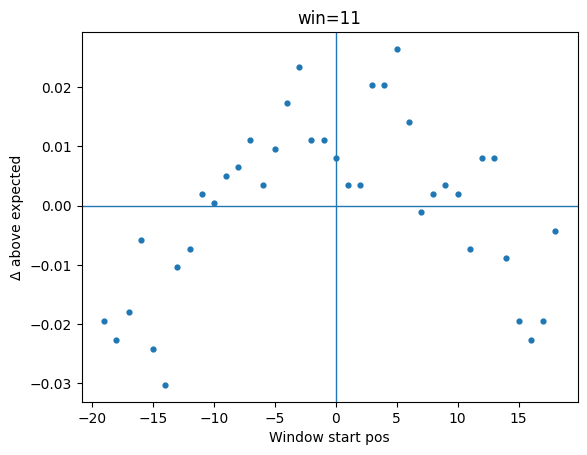

In [196]:
plot_sliding_window(11, r_cw, snap_tot)

In [172]:
ev_spin(11, 0.02)

0.006578947368423016